# `Материалы кафедры ММП факультета ВМК МГУ. Введение в глубокое обучение.`

# `Занятие 01. Введение в глубокое обучение`

## `Занятие провел: Алексеев Илья (@voorhs)`

## `Материалы составил: Алексеев Илья (@voorhs)`

### `Москва, Весенний семестр 2026`


На этом занятии:
- вспоминаем логистическую регрессию
- вводим граф вычислений, композицию функций, правила дифференцирования
- интерпретируем стекинг логистических регрессий
- рассматриваем гипотезу компактности
- выводим алгоритм обратного распространения ошибки
- ставим проблему переиспользования параметров
- обсуждаем общие причины становления глубокого обучения


---

## Вспоминаем ML

### Логистическая регрессия

Пусть имеется выборка $\{(x_i,y_i)\}_{i=1}^\ell$, где $x_i\in\mathbb{R}^d$ &ndash; признаковое описание $i$-го объекта, $y_i\in\{-1,+1\}$ &ndash; метка класса.

Мы имеем дело с задачей бинарной классификации. В классическом машинном обучении существует алгоритм линейной классификации: $y(x)=\text{sign}(w^Tx)$, где $w\in\mathbb{R}^d$ &ndash; обучаемые веса. Обучение происходит за счет минимизации эмпирического риска $Q$, который представляет собой сумму функций потерь по всем объектам в обучающей выборке: $Q=\sum\limits_{i=1}^\ell\mathcal{L}(x_i,y_i,w)$.

Линейный классификатор называют логистической регрессией, если в качестве $\mathcal{L}$ выбрано следующее:
$$
\mathcal{L}(x,y,w)=-\log\sigma(yw^Tx),\quad\sigma(z)={1\over1+\exp(-z)}.
$$

Функционал $Q$ в таком случае называют **логлоссом**.

Задачу оптимизации логлосса решают градиентными методами (например, SGD, LBFGS). Они требуют знание аналитических формул для подсчета градиента. Градиент функции потерь $\mathcal{L}$ можно вычислить с помощью стандартных правил матрично-векторного дифференцирования и chain rule:
$$
\begin{aligned}
{\partial\mathcal{L}\over\partial w}&={\partial yw^Tx\over\partial w}{\partial \sigma(yw^Tx)\over\partial yw^Tx}{\partial (-\log\sigma)\over\partial \sigma}=\\
&=yx\cdot\sigma(yw^Tx)(1-\sigma(yw^Tx))\cdot{-1\over\sigma(yw^Tx)}=\\
&=-yx(1-\sigma(yw^Tx)).
\end{aligned}
$$

### `Граф вычислений логистической регрессии`

Давайте взглянем на алгоритм логистической регрессии с точки зрения входов, выходов и промежуточных результатов. Введем обозначения:

- $z:=w^Tx$ &ndash; логит,
- $a:=\sigma(z)$ &ndash; вероятность,
- $\mathcal{L}:=-\log a$ &ndash; значение функции потерь.

Справедлива следующая схема:

Вершины в графе обозначают численные значения, ребра &ndash; операции. Зеленым цветом обозначены входы алгоритма (признаковое описание), оранжевым цветом обозначен выход, синим цветом обозначены промежуточные вычисления.

### Мультиномиальная регрессия

Пусть имеется выборка $\{(x_i,y_i)\}_{i=1}^\ell$, где $x_i\in\mathbb{R}^d$ &ndash; признаковое описание $i$-го объекта, $y_i\in\{1,\ldots,K\}$ &ndash; метка класса.

Мы имеем дело с задачей многоклассовой классификации. В классическом машинном обучении существует алгоритм линейной классификации:
$$
y(x)=\text{arg}\max_{1\leqslant k\leqslant K}(w_k^Tx),
$$
где $W\in\mathbb{R}^{K\times d}$ &ndash; обучаемые веса.

Линейный классификатор называют мультиномиальной регрессией, если в качестве $\mathcal{L}$ выбрано следующее:
$$
\mathcal{L}(x,y,w)=-\log{\exp(w_y^Tx)\over\sum\limits_{k=1}^K\exp(w_k^Tx)}.
$$
Функционал $Q$ в таком случае называют кросс-энтропией. Заметим, что в некотором смысле алгоритм мультиномиальной регрессии состоит из $K$ логистических регрессий.

### Граф вычислений мультиномиальной регрессии

Введем обозначения:

-  $z_k:=w_k^Tx$ &ndash; логит для класса $k$,
- $a_k:=\exp(z_k)$ &ndash; активация для класса $k$.

 Справедлива следующая схема:

## Многослойная полносвязная сеть

Заметим, что активации $a_i$ выстраиваются в ряд, подобный тому, в который выстраиваются входы $x_i$. Идея многослойной полносвязной сети (прибизительно) состоит в том, чтобы подать активации $a_i$ на вход другой мультиномиальной регрессии, а для подсчета функции потерь использовать финальные активации. Эту операцию можно повторить $L$ раз и получится $L$ “слоев”.

Схема для $L=2$:

Немного терминологии. На данной схеме:

- $W^1\in\mathbb{R}^{n\times d}$ &ndash; обучаемые веса первого слоя,
- $W^2\in\mathbb{R}^{K\times n}$ &ndash; обучаемые веса второго слоя,
- $f:\mathbb{R}\to\mathbb{R}$ &ndash; некоторое нелинейное преобразование, т.н. функция активации (например, сигмоида),
- $z^1,a^1\in\mathbb{R}^n$ &ndash; активации первого слоя (а не логиты и вероятности),
- $z^2,a^2\in\mathbb{R}^K$ &ndash; активации второго слоя (но по совпадению логиты и вероятности).

Каждый $z$ еще называют суммматором, или нейроном (по аналогии из биологии, согласно которой нейроны суммируют сигналы от других нейронов, с которыми они связаны). Активации $z^1$ и $z^2$ называют слоями нейронов.

Есть и жаргонные термины. Линейные преобразования $z^1=W^1x$ и $z^2=W^2a_1$ называют линейными слоями (хотя на самом деле это операции, а не ряды чисел, и никакие слои они не могут образовывать). Так же и операцию $f$ часто называют слоем активации (хотя никаких слоев нет).

<font color='Orange'>**Вопрос:**</font>
Какой смысл в многослойной архитектуре, как можно интерпретировать такую модель?


## Обучение репрезентаций

Какой смысл в многослойной архитектуре? Если отвечать коротко, то каждый слой преобразует признаки и делает их более абстрактными и высокоуровневыми.

Рассмотрим на примере задачи классификации изображения. Будем подавать каждое (монохромное) изображение размера $H\times W$ в виде вектора $x\in\mathbb{R}^{HW}$, где каждое число означает яркость соответствующего пикселя. Каждый нейрон первого слоя действует как логистическая регрессия, которая “детектирует” наличие ярких точек в некоторых частях изображения. Например, вполне допустимо, что один нейрон будет “детектировать” некоторую прямую линию, как и остальные нейроны в слое. Вся эта информация затем подается во второй слой (например, в виде вероятностей из сигмоиды). И тогда нейроны (=бинарные классификаторы) второго слоя вполне вероятно смогут обучиться видеть целые геометрические фигуры. Все потому что им поступает более высокоуровневая информация нежели сырые пиксели. На вход третьему слою уже пойдет информация о том, какие геометрические фигуры и в каких местах есть на изображении, а на основании этого вполне реально произвести классификацию и понять, что за существо изображено на картинке.

Таким образом, многослойная архитектура позволяет выучивать преобразования признаков, делать их более высокоуровневыми и абстрактными. С этим связано название глубокое обучение &ndash; так называют раздел машинного обучения, изучающего нейронные сети, &ndash; поскольку все нейросети имеют тенденцию быть многослойными (=глубокими).

Стоит заметить, что важной частью многослойной полносвязной сети являются нелинейные преобразования. Они стоят между линейными преобразованиями. Если бы функций активаций не было и все линейные преобразования шли подряд, то вся нейросеть была бы эквивалентна одной линейной модели. Таким образом, функции активации повышают репрезентативную способность нейросетей, расширяя их до класса нелинейных моделей.



<font color='Orange'>**Вопрос:**</font>
Мы уже обсудили, что такое многослойные нейронные сети и то, что их можно интерпретировать как последовательное извлечение признаков. Для каких доменов стоит применять нейронные сети? Что объединяет названные вами домены?


## Гипотеза компактности

Многослойность архитектуры нейросетей связана с вопросом о том, когда применять нейронные сети.

Ответ: **в тех доменах, где не выполнена гипотеза компактности.**

Гипотезой компактности называют свойство данных, в которых семантически похожим объектам соответствуют близкие по метрике векторные представления (признаковые описания).

Вот пример данных, для которых выполнена гипотеза компактности.

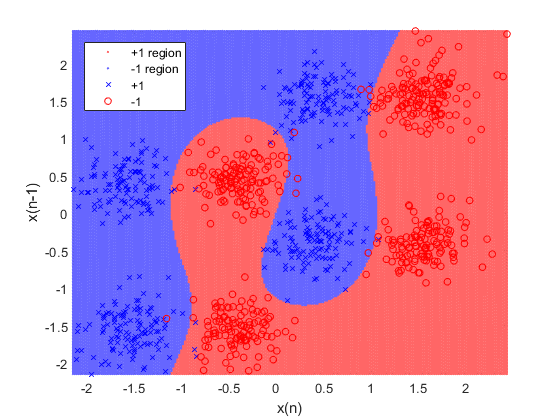

[Источник](https://www.researchgate.net/figure/SVM-Decision-Boundaries-for-AWGN-and-different-detector-delays-a-Detector-delay-D-0_fig2_345261086)

Рассмотрим примеры данных, в которых гипотеза компактности не выполнена.

Во-первых, это изображения. Ниже представлены два изображения буквы омега. С точки зрения смысла, эти изображения являются очень похожими объектами. Однако если мы вытянем эти пиксели в вектора, то косинус между ними будет нулевой, а евклидово расстояние ожидаемо большим.

Во-вторых, это текст на естественном языке. Ниже представлены два предложения с одинаковым смыслом, но с абсолютно разными словами (за исключением стоп-слов). Векторные представления в виде мешка слов имеют нулевой косинус и большое евклидово расстояние

> 1. The cat is sleeping on the couch.
> 2. A feline rests upon the sofa.

В-третьих, это аудио-сигнал. Если одно и то же слово произнесут два человека с разной высотой голоса, то волноформа сильно поменяется, хотя смысл сообщения останется тем же.

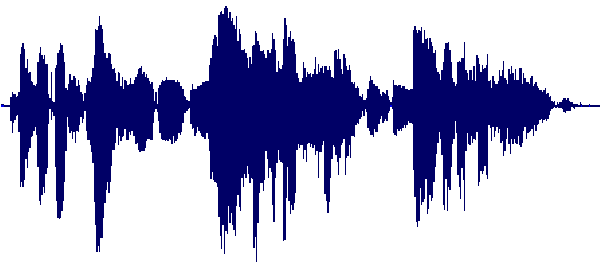

Примеров еще очень много. Со всеми ними нейросети справляются за счет того, что каждый слой преобразует сырые признаки и получает все более абстрактные. При этом на последнем слое получается богатое признаковое описание, для которого гипотеза компактности выполнена, поскольку финальный слой &ndash; это просто мультиномиальная регрессия.

## Проход вперед/Forward pass


Формализуем алгоритм предсказания с помощью нейронной сети в виде так называемого прохода вперед (forward pass).

---

Алгоритм **MLP FORWARD PASS**

- ВХОД $x\in\mathbb{R}^d$
- ВЫХОД $\mathcal{L}\in\mathbb{R}$

---

1. $ a^0 := x $

2. for $ i = 1, 2, 3, \ldots, L $

   3. $ z^i := W^i a^{i-1}$

   4. $ a^i := f(z^i) $

5. $ \mathcal{L} := \text{CrossEntropy}(a^L)$

---

Изобразим этот алгоритм в виде схемы из функциональных элементов (СФЭ):

На этой схеме:

- Функциональный элемент $\Sigma^i$ &ndash; это линейное преобразование с весами $W^i$ (сигма &ndash; потому что сумматор).
- Функциональный элемент $f$ &ndash; это функция активации.
- Функциональный элемент CE считает значение кросс-энтропии (в нее включен софтмакс и взятие логарифма от нужной компоненты)

Алгоритм называют проходом вперед, поскольку его можно представить как путь в СФЭ от входа к выходу.

СФЭ является графической репрезентацией композиции нескольких функций. Например, для случая $L=1$ это $\mathcal{L}=\text{CE}(f(Wx))$, а для $L=2$ это $\mathcal{L}=\text{CE}(f(W^2f(W^1x)))$.


## Проход назад/Backward pass (идейно)

Нейросети обучают градиентными методами по аналогии с тем, как обучают линейные модели классификации:
$$
W^i_\text{new}=W^i_\text{old}-\eta{\partial L\over \partial W^i},\quad i=\overline{1,L}.
$$
Но как считать $\partial\mathcal{L}/\partial W^i$?

Воспользуемся правилами дифференцирования сложной функции. Для примера разберем случай $L=1$, т.е. функцию $\mathcal{L}=\text{CE}(f(Wx))$.
$$
\begin{aligned}
{\partial\mathcal{L}\over\partial a}&={\partial \text{CE}\over \partial a},\\
{\partial\mathcal{L}\over\partial z}&={\partial f\over \partial z}{\partial \mathcal{L}\over \partial a},\\
{\partial\mathcal{L}\over\partial W}&={\partial \Sigma\over \partial W}{\partial \mathcal{L}\over \partial z}.
\end{aligned}
$$
Таким образом, чтобы вычислить градиент лосса по весу $W^i$, нужно вычислить градиент лосса по всем активациям с более глубоких слоев (т.е. с номерами $i+1,\ldots, L$). Т.е. вычисления идут от выхода схемы ($\mathcal{L}$) к ее входу ($x$). Алгоритм вычисления градиентов весов многослойной сети называют проходом назад (backward pass), или алгоритмом обратного распространения ошибки (bakwards propagated error, backpropagation).

---

Алгоритм **MLP BACKWARD PASS**

- ВХОД $\mathcal{L}\in\mathbb{R}$
- ВЫХОД $\left\{{\partial\mathcal{L}\over\partial W^i}\right\}_{i=1}^L$

---

1. ${\partial\mathcal{L}\over\partial a^L}:={\partial\text{CE}\over\partial a^L}$
2.  for $i=L,L-1,\ldots,2,1$:
   3. ${\partial\mathcal{L}\over\partial z^i}:={\partial f\over \partial z^i}{\partial \mathcal{L}\over \partial a^i}$
   3. ${\partial\mathcal{L}\over\partial W^i}:={\partial\Sigma\over\partial W^i}{\partial\mathcal{L}\over\partial z^i}$
   3. ${\partial\mathcal{L}\over\partial a^{i-1}}:={\partial\Sigma\over\partial a^{i-1}}{\partial\mathcal{L}\over\partial z^i}$

---

Ценность этого алгоритма в его обобщении на произвольную СФЭ с дифференцируемыми функциями. Допустим, имеется функциональный элемент $F$, реализующий функцию $y=F(x)$, параметризованную весами $W$. Схематично:



В режиме прохода вперед, элемент $F$ работает с весами и активациями, а в режиме прохода назад &ndash; с градиентами лосса по весам и активациям. Эта абстракция находит свое применение в так называемых фреймворках автодифференцирования. Такие фреймворки содержат в себе имплементации проходов вперед и назад для большинства базовых арифметических и матрично-векторных операций. При выполнении любых вычислений такие фреймворки “под капотом” строят граф вычислений и за счет этого позволяют считать все необходимые градиенты автоматически за счет прохода назад по графу.

## Универсальный аппроксиматор

До сих пор мы не задавались вопросом о теоретическом обосновании работоспособности нейросетей. Оказывается, таковое имеется. Существует ряд теорем, которые утверждают, что нейронные сети являются универсальными аппроксиматорами в том смысле, что способны приближать любую функцию с любой наперед заданной точностью и при этом иметь конечное число нейронов. Однако стоит сказать, что все эти теоремы имеют ограничения на свойства функции (непрерывность / аналитичность / ограниченность и т.п.). И самое главное, эти теоремы в большинстве своем не отвечают на вопрос, как построить такую нейросеть, чтобы она приближала конкретную функцию c конкретной точностью. Эти теоремы лишь допускают существование таких архитектур и весов, удовлетворяющих условиям задачи.

Подробнее почитать об этом можно в свежем обзоре: "A Survey on Universal Approximation Theorems", Midhun T Augustine, https://arxiv.org/abs/2407.12895, (52 цит.).

Ниже представлен пример теоремы.

**Утверждение:**

Положим, $f(x)$ определена и непрерывна на отрезке $[a, b]$. Тогда, существует многослойный перцептрон с двумя скрытыми слоями равномерно приближающий $f$ на $[a, b]$.

**Доказательство:**

Разобьём отрезок $[a, b]$ на $N_{\epsilon}$ отрезков таких, что $\sup\limits_{x_{1}, x_{2} \in [a_{i}, b_{i}]}|f(x_{1}) - f(x_{2})| < \frac{\epsilon}{2}$. Положим $f_{i} = f(a_{i})$.

Заметим,
$$f(x) = \sum\limits_{i=1}^{N_{\epsilon}} \mathbb{1}[x \in [a_{i}, b_{i}]]f_{i} = \sum\limits_{i=1}^{N_{\epsilon}} \mathbb{1}[\mathbb{1}[x > a_{i}] + \mathbb{1}[x < b_{i}] > 1]f_{i}$$

Положим, что MLP использует функцию активации, такую что:
$$
\lim_{x\rightarrow -\infty}g(x) = A\;\;\;\; \lim_{x\rightarrow \infty}g(x) = B\;\;\;\; A \leq g(x) \leq B \;\forall x \in \mathbb{R} \;\; (1)
$$

Без потери общности будем считать, что $A = 0, B = 1$

Тогда, после первого слоя MLP вычислим величины $g^{a_{i}} = g(\frac{a_{i} - x}{h}), g^{b_{i}} = g(\frac{x - b_{i}}{h})$

Затем, на втором слое вычислим: $g^{i} = g(\frac{g^{a_{i}} - g^{b_{i}} - 1}{h}) \overset{h \rightarrow 0}{\longrightarrow} \mathbb{1}[\mathbb{1}[x > a_{i}] + \mathbb{1}[x < b_{i}] > 1] = \mathbb{1}[x \in [a_{i}, b_{i}]]$.

Тогда, положим $h$ таким, что $|\mathbb{1}[x \in [a_{i}, b_{i}]] - g^{i}| < \frac{\epsilon}{2sup_{x\in[a, b]}f(x)} \; \forall i \in \{1, ..., N_{epsilon}\}$.

Тогда, положив веса MLP на выходном слое равными $f_{i}$ получим, что MLP в точности равен:
$$\hat{f}(x) = \sum\limits_{i=1}^{N_{\epsilon}}g^{i}f_{i}$$

Наконец,
$$
|f(x) - \hat{f}(x)| = |f(x)\mathbb{1}[x \in [a_{j}, b_{j}]] - f_{j}g^{j}| < |f(x)||\mathbb{1}[x \in [a_{j}, b_{j}]] - g^{j}| + |f(x) - f_{j}||g^{j}| < \epsilon \; \forall x \in [a, b]
$$

На самом деле, условие теоремы можно ослабить.
1. Достаточно иметь только один скрытый слой в MLP
2. Необязательно использовать функцию активации, удовлетворяющую $(1)$. Любая неполиномиальная функция, даже неограниченная подходит. (например, $g(x) = \max(0, x)$)

Формально, двух слоёв достаточно для приближения любой функции, однако, на практике, есть проблемы &ndash; количество весов, необходимое для аппроксимации растёт экспоненциально с размерностью пространства. То есть сеть становится очень широкой.

## Рост числа параметров

Вернемся к задаче классификации изображений на $K$ классов. Насколько большую нейросеть с полносвязными слоями мы можем построить для решения такой задачи? Пусть изображение 100 на 100 пикселей. Входной вектор будет иметь длину $10^4$. Допустим, у нас будет два скрытых слоя со 300 нейронами и выходной слой с $K$ нейронами. Тогда веса первого полносвязного слоя это матрица $W^1\in\mathbb{R}^{300\times10000}$, т.е. это $3\times10^6$ параметров. Веса второго слоя это матрица $W^2\in\mathbb{R}^{300\times 300}$, т.е. $9\times10^4$ параметров. Третий слой это $W^3\in\mathbb{R}^{K\times 150}$.

Этот пример показывает, как быстро растет число обучаемых параметров в полносвязной нейросети с увеличением её глубины и ширины (числа слоев и числа нейронов в каждом слое). Заметим, что для работы с изображением не обязательно назначать свой нейрон каждому пикселю входного изображения, поскольку это избыточная репрезентативная мощность. Вместо этого, мы могли бы применять одни и те же параметры к разным частям изображения. Тогда графические примитивы будут детектированы в нескольких местах с помощью одного и того же набора параметров, и не придется заводить “детектор” для каждой части изображения. Именно по этой причине в глубоком обучении существует множество других архитектур.

В нашем курсе мы изучим сверточные, рекуррентные, трансформерные архитектуры. Вся их гениальность и прозорливость состоит в том, что они спроектированы специально для некоторого домена данных (изображения, последовательности, тексты). Они учитывают все степени свободы и координаты входных данных таким образом, чтобы наиболее эффективно аллоцировать обучаемые параметры.

## Успех глубокого обучения

Успех глубокого обучения связывают с несколькими факторами:

- DL это автоматическая генерация признаков. Рассмотрим на примере работы с изображениями. До нейросетей все задачи решались следующим образом:

  - инженер по компьютерному зрению генерировал признаки с помощью преобразования Фурье или wavelet-разложения
  - детектировал конкретные геометрические фигуры с помощью сложных алгоритмов и информацию об этом тоже помещал в признаковое описание
  - придумывал еще миллион признаков
  - и все это признаковое описание подавал на вход классическим ML алгоритмам вроде логрега, SVM, random forest

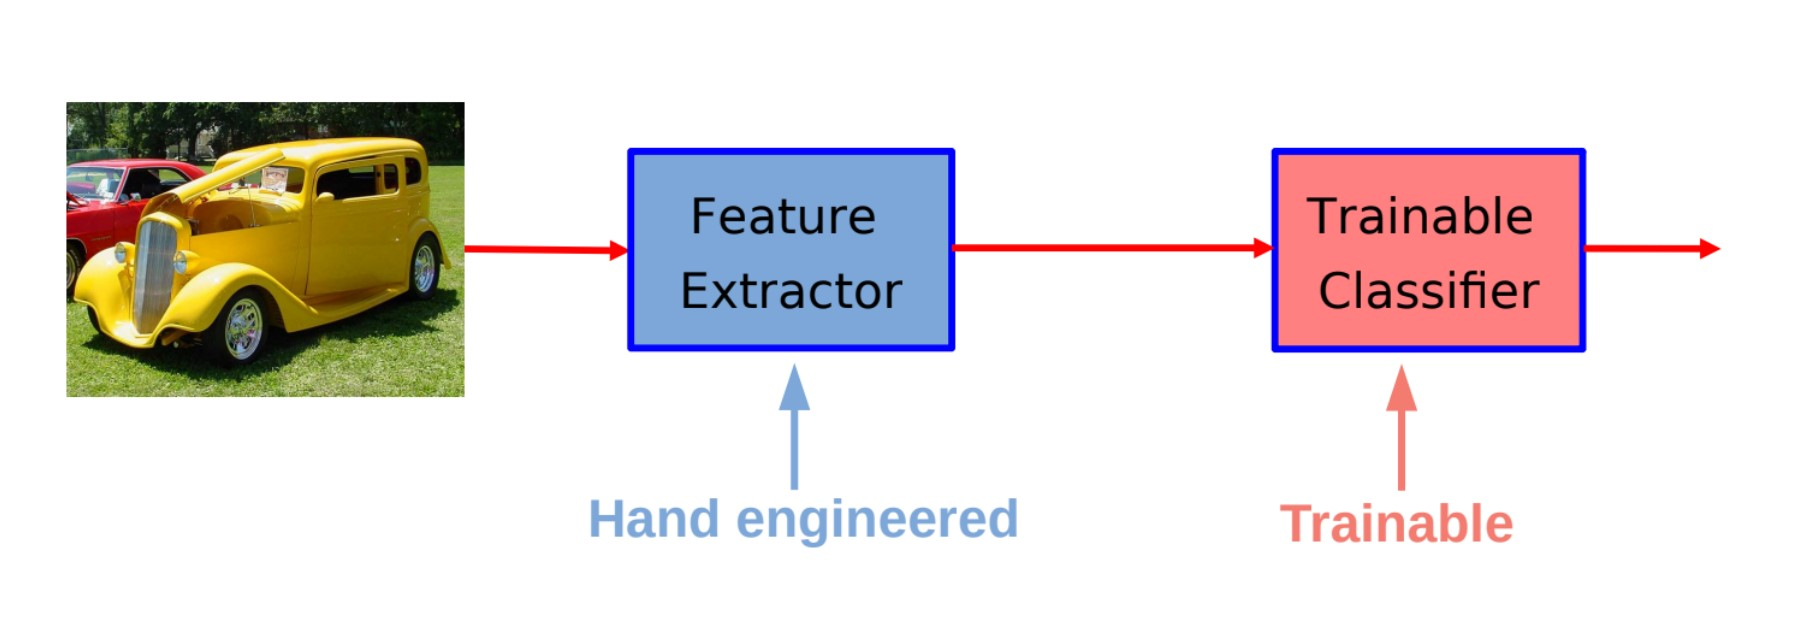

С приходом нейросетей весь этот сложный пайплайн значительно упростился за счет того, что не нужно “крафтить” признаки (hand-crafted features). Вместо этого нейросеть сама действует как фичегенератор.  

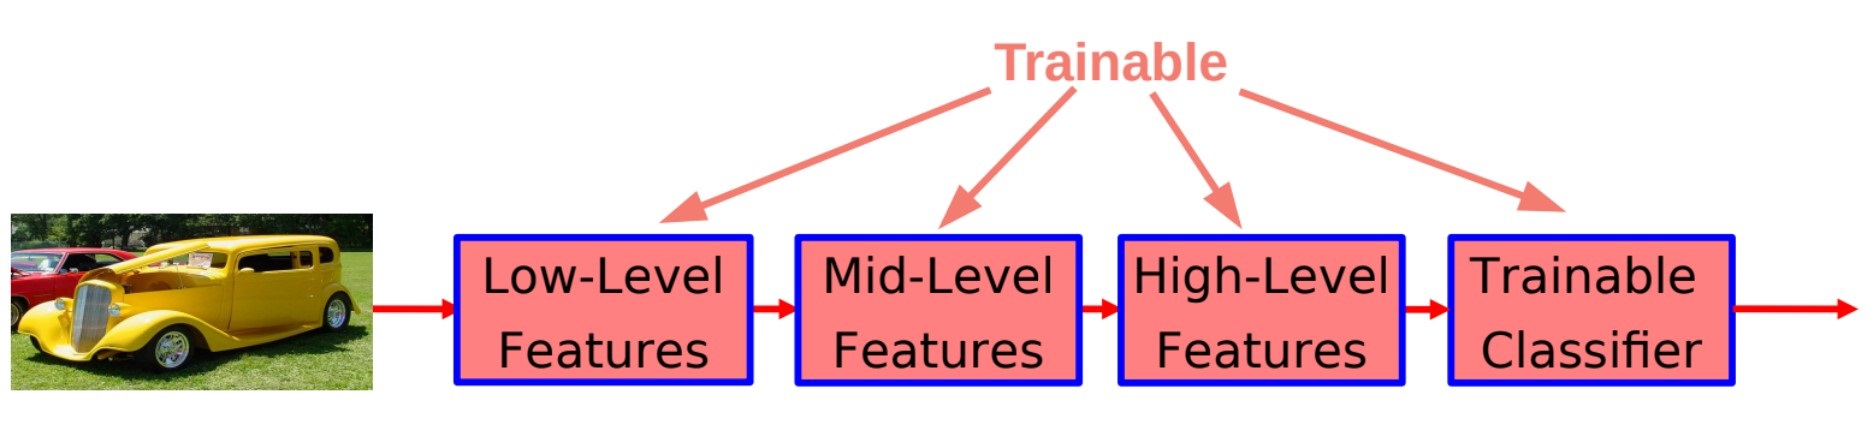



- DL это матричные операции. Львиная доля операций, совершаемая при проходе вперед (и при проходе назад, на самом деле) &ndash; это перемножение матриц. Эта операция является невероятно оптимизированной для современных процессоров, в частности графических процессоров.

- DL это GPU. За последние десятилетия мощность GPU значительно выросла и они стали доступнее.

- DL это данные. Секрет успеха также кроется в огромном количестве данных. Как правило, нейросети плохо обучаются на маленьких выборках, но при этом умеют отлично генерализировать при обучении на огромных выборках. Говорят, что у нейросетей большая емкость (capacity).

- DL это автодифференцирование. За последние 10 лет фреймворки автодифференцирования стали невероятно эффективными и удобными. Использование автодифа означает, что нейросеть может состоять из совершенно любых операций, главное условие &ndash; они должны быть дифференцируемыми. Это открывает огромную гибкость при проектировании и реализации архитектур.